In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
import seaborn as sns
from pathlib import Path

from mawkutils.data import SmoothKaggleDataSet, KaggleDataSet, Daimler2020DataSet, Toyota2020DataSet, Huawei2022DataSet, LinzDataSet, DBManager as DBM
from mawkutils.render import prettify


IMG_PATH = Path().cwd().parent / 'notebooks' / 'img'
BIN_PATH = Path().cwd().parent / 'data' / "output" / "static_blackbox_estimates"
dataset_path = Path().cwd().parent / "data" / "input" / "measures_v2.csv"
pd.set_option('display.max_rows', 100)


## Load up data sets

In [2]:
kaggle_ds = KaggleDataSet(with_extra_cols=True)
kaggle_ds.data.T

,0,1,2,3,4,5,6,7,8,9,...,1330806,1330807,1330808,1330809,1330810,1330811,1330812,1330813,1330814,1330815
ambient,19.850691,19.850672,19.850657,19.850647,19.850639,19.850634,19.850630,19.850628,19.850626,19.850624,...,2.398051e+01,2.398750e+01,2.397993e+01,2.400528e+01,2.400501e+01,2.398908e+01,2.397070e+01,2.397723e+01,2.400142e+01,2.402752e+01
coolant,18.805172,18.818571,18.828770,18.835567,18.857033,18.901548,18.941711,18.960861,18.973545,18.987812,...,3.072118e+01,3.072122e+01,3.072125e+01,3.072127e+01,3.072129e+01,3.072130e+01,3.072131e+01,3.072131e+01,3.072132e+01,3.072132e+01
u_d,-0.350055,-0.305803,-0.372503,-0.316199,-0.332272,0.009147,0.238890,0.395099,0.546623,0.578944,...,7.726358e-01,7.637910e-01,7.754504e-01,7.970274e-01,7.784917e-01,7.918007e-01,7.788999e-01,8.049145e-01,7.630907e-01,8.073093e-01
u_q,-0.450682,-0.325737,-0.440864,-0.327026,-0.471150,-0.538973,-0.653148,-0.758392,-0.727128,-0.874307,...,-2.213825e+00,-2.180703e+00,-2.230760e+00,-2.150360e+00,-2.229986e+00,-2.152128e+00,-2.258684e+00,-2.130312e+00,-2.268498e+00,-2.100158e+00
motor_speed,0.002866,0.000257,0.002355,0.006105,0.003133,0.009636,0.001337,0.001422,0.000577,-0.001248,...,3.158644e-03,-2.161091e-03,3.757070e-03,-3.702722e-03,-4.187160e-03,3.798703e-04,2.984785e-03,2.300785e-03,5.662140e-03,4.395039e-03
i_d,0.004419,0.000606,0.001290,0.000026,-0.064317,-0.613635,-1.005647,-1.288384,-1.490530,-1.634464,...,-2.000692e+00,-1.999811e+00,-2.000519e+00,-2.001002e+00,-2.000426e+00,-2.000169e+00,-2.000499e+00,-1.999268e+00,-2.000999e+00,-2.000792e+00
i_q,0.000328,-0.000785,0.000386,0.002046,0.037184,0.336747,0.554211,0.706370,0.817339,0.898013,...,1.096156e+00,1.098722e+00,1.096636e+00,1.096998e+00,1.097757e+00,1.097528e+00,1.097569e+00,1.098765e+00,1.095696e+00,1.096487e+00
profile_id,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01
pm,24.554214,24.538078,24.544693,24.554018,24.565397,24.573601,24.576578,24.574949,24.567080,24.553242,...,6.219520e+01,6.218892e+01,6.218301e+01,6.217856e+01,6.217208e+01,6.214778e+01,6.214265e+01,6.213839e+01,6.213342e+01,6.213143e+01
stator_yoke,18.316547,18.314955,18.326307,18.330833,18.326662,18.323862,18.321936,18.314655,18.306925,18.301733,...,3.866776e+01,3.866565e+01,3.866961e+01,3.866750e+01,3.866690e+01,3.865372e+01,3.865633e+01,3.865092e+01,3.865569e+01,3.866037e+01


In [8]:
datasets_d = {kaggle_ds.name: {'ds': kaggle_ds, 'speed_col': 'motor_speed', 'torque_col': 'torque'},
              }
# other data sets would be loaded up here, too, but are omitted due to NDAs

## Visuals


### Heat map

In [9]:
N_BINS = 100
for ds_name, vals_d in datasets_d.items():
    ds = vals_d["ds"]
    torque_s = ds.data.loc[:, vals_d["torque_col"]]
    speed_s = ds.data.loc[:, vals_d["speed_col"]]
    ds.data["binned_torque"] = pd.cut(torque_s.values.ravel() / torque_s.abs().max(), 
                                      bins=np.linspace(-1.0, 1.0, N_BINS+1), include_lowest=True, 
                                      labels=np.linspace(-1.0, 1.0, N_BINS)
                                      )
    ds.data["binned_speed"] = pd.cut(speed_s.values.ravel() / speed_s.abs().max(), 
                                     bins=np.linspace(0.0, 1.0, N_BINS+1), include_lowest=True, 
                                     labels=np.linspace(0.0, 1.0, N_BINS)
                                     )

ts_maps_d = {ds_name: vals_d["ds"].data.loc[:, ['binned_torque', 'binned_speed', vals_d["torque_col"]]]
             .groupby(['binned_torque', 'binned_speed']).count().fillna(0).reset_index()
             .rename(columns={vals_d["torque_col"]: 'count'})
             .pivot(index='binned_torque', columns='binned_speed', values='count')
             .sort_values('binned_torque', ascending=False)
             #.clip(0, 150)  # clip for better visual effect
             for ds_name, vals_d in datasets_d.items()}



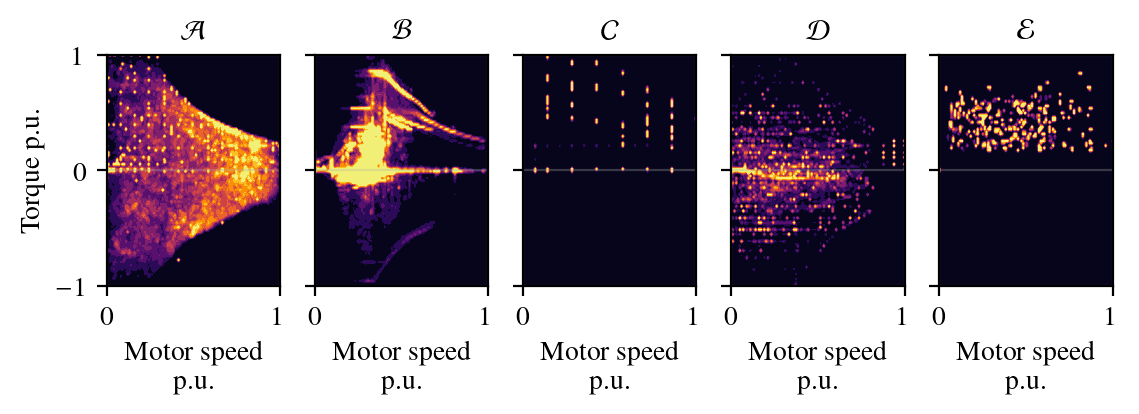

In [11]:
# heat map in speed-torque plane
fig_scale = 1.0  # for seaborn "talk" context
fig_size = (6.49*fig_scale, 1.5*fig_scale)   # fit into diss format
fig, axes = plt.subplots(1, len(ts_maps_d), sharex=True, sharey=True, figsize=fig_size, dpi=200)

for i, (ax, (ds_name, ts_map)) in enumerate(zip(axes.flatten(), ts_maps_d.items())):
    #sns.heatmap(ts_map, robust=True, square=False, #yticklabels=49, xticklabels=49, 
    #            cbar=False, cmap='inferno', ax=ax)
    x = ts_map.columns.to_numpy()
    y = ts_map.index.to_numpy()
    xx, yy = np.meshgrid(x, y)
    p = ax.contourf(xx, yy, ts_map.clip(0, 200) , cmap="inferno",  levels=10)
    if ax == axes[0]:
        ax.set_ylabel('Torque p.u.')
    ax.set_xlabel('Motor speed\np.u.')
    ax.set_xticks([0, 1.0])
    ax.set_yticks([-1.0, 0.0, 1.0])

    ax.set_title(f"$\mathcal{{{['A', 'B', 'C', 'D', 'E'][i]}}}$")
    #ax.set_xticklabels([0, 1])
    #ax.set_yticklabels([1, 0, -1])
    #prettify(ax)
#fig.tight_layout()
plt.savefig(IMG_PATH / 'diss_datasets_heatmap.jpg', dpi=300, bbox_inches='tight')


### time series plot

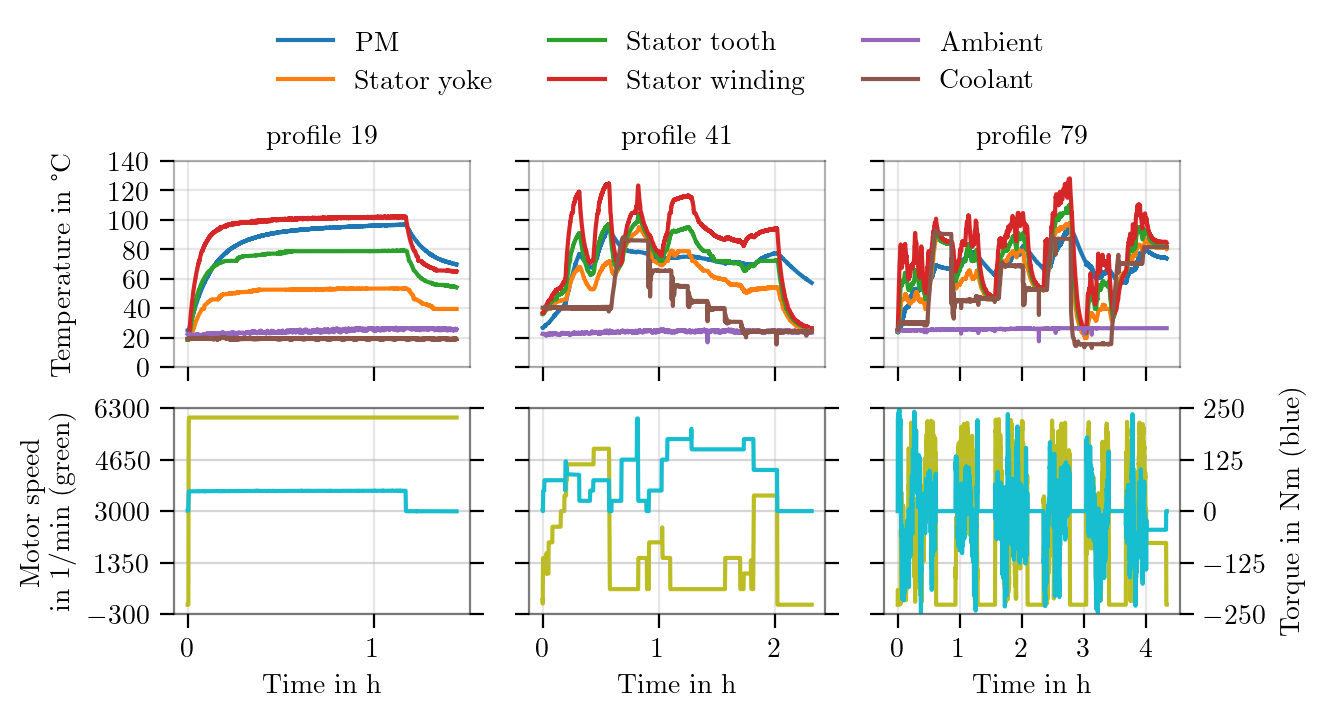

In [10]:
ds = kaggle_ds
coi = ds.target_cols + ["ambient", "coolant"]
col_format_d = {"pm": "PM", "stator_yoke": "Stator yoke", "stator_tooth": "Stator tooth", 
                "stator_winding": "Stator winding", "ambient": "Ambient", "coolant": "Coolant"}
poi = [19, 41, 79]
n_cols = len(poi)
n_rows = 2 # temps, motor speed, torque
fig_scale = 1.0  # for seaborn "talk" context
fig_size = (6.49*fig_scale, 1.5*fig_scale*n_rows)   # fit into diss format
fig, axes = plt.subplots(n_rows, n_cols, sharey="row", sharex="col", figsize=fig_size, dpi=200)
for i, p in enumerate(poi):
    ax = axes[0, i]
    df = ds.data.query(f"{ds.pid} == @p").reset_index(drop=True)
    for c in coi:
        lines = ax.plot(df[c], label=col_format_d[c],)
    #ax.text(0.5, 0.89, s=f'profile {p}', transform=ax.transAxes,)
    ax.set_title(f'profile {p}')
    if i == 0:
        ax.set_ylabel('Temperature in °C')
    tcks = np.arange(0, np.around(len(df), -3), 7200)
    tcks_lbls = tcks // 7200
    ax.set_xticks(tcks)
    ax.set_ylim(0, 140)
    ax.yaxis.set_major_locator(LinearLocator(numticks=8))
    #ax.grid(alpha=0.5)
    prettify(ax)

    ax = axes[1, i]
    ax.plot(df['motor_speed'], color="tab:olive")
    if i == 0:
        ax.set_ylabel("Motor speed\nin 1/min (green)")
        #ax.set_yticklabels(ax.get_yticks(), rotation=15)
    ax.set_xticks(tcks)
    ax.yaxis.set_major_locator(LinearLocator(numticks=5))
    
    #ax.grid(alpha=0.5)
    prettify(ax)

    ax2 = ax.twinx()
    ax2.plot(df['torque'], color='tab:cyan')
    if i == n_cols - 1:
        ax2.set_ylabel("Torque in Nm (blue)")
        #ax2.set_yticklabels(ax2.get_yticks(), rotation=15)
    else:
        ax2.set_yticklabels([])
    ax2.set_ylim(-250, 250)
    ax2.yaxis.set_major_locator(LinearLocator(numticks=5))
    
    """ax = axes[2, i]
    ax.plot(df['torque'])
    if i == 0:
        ax.set_ylabel("Torque in Nm")
    ax.set_xticks(tcks)"""
    #ax.grid(alpha=0.5)
    #ax2.grid(alpha=0.5)

    ax.set_xticklabels(tcks_lbls)
    ax.set_xlabel('Time in h')

    prettify(ax2)
#fig.tight_layout()
fig.align_ylabels(axes[:, 0])
_ = axes[0, 0].legend(ncol=3, loc='lower center', bbox_to_anchor=(.5, .95), bbox_transform=fig.transFigure, frameon=False)

plt.savefig(IMG_PATH / 'diss_ts_data_examples.pdf', dpi=300, bbox_inches='tight')

/tmp/ipykernel_30643/1540767272.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, "3k", "6k"])
/tmp/ipykernel_30643/1540767272.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, "3k", "6k"])


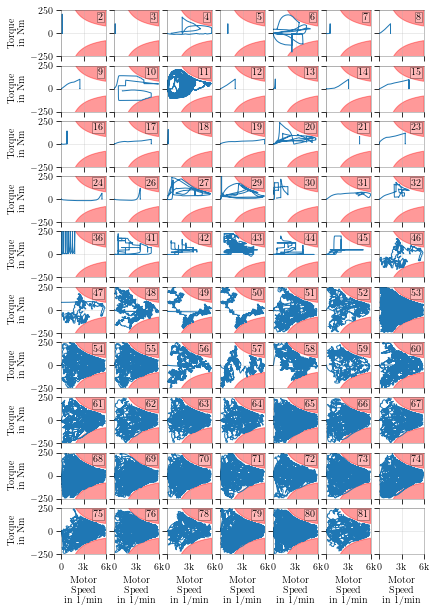

In [11]:
# speed-torque plane coverage
P_lim = 50e3
x = np.linspace(10, max(ds.data.motor_speed), 180)
torque_lim = P_lim*60/(2*np.pi*x)
annot_bbox_kws = {'facecolor': 'white', 'edgecolor': 'black',
                  'alpha': 0.3, 'pad': 1.0}
# print(torque_lim)
n_cols = 7
xlbl = 'Motor\nSpeed\nin 1/min'
grpd = ds.data.groupby(ds.pid)
n_rows = np.ceil(grpd.ngroups / n_cols).astype(int)
fig, axes = plt.subplots(n_rows, n_cols, sharey=True, sharex=True,
                         figsize=(6.49*fig_scale, 1.0*fig_scale*n_rows))   # fit into diss format
for i, (ax, (p_id, df_)) in enumerate(zip(axes.flatten(), grpd)):
    ax.plot(df_.motor_speed, df_.torque, lw=1)
    ax.text(0.95, 0.95, s=f'{p_id}', transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right', bbox=annot_bbox_kws)
    ax.fill_between(x, torque_lim, 10*torque_lim, color='r', alpha=0.4)
    ax.fill_between(x, -torque_lim, -10*torque_lim, color='r', alpha=0.4)
    if i >= len(grpd)-n_cols+1:
        ax.set_xlabel(xlbl)
        ax.xaxis.set_major_locator(LinearLocator(numticks=3))
        ax.set_xticklabels([0, "3k", "6k"])
    ax.set_xlim([0, 6000])
    ax.set_ylim([-250, 250])
    if i % n_cols == 0:
        ax.set_ylabel('Torque\nin Nm')
        ax.yaxis.set_major_locator(LinearLocator(numticks=3))
    prettify(ax)
ax = axes[-1, -1]
ax.set_xlabel(xlbl)
ax.xaxis.set_major_locator(LinearLocator(numticks=3))
ax.set_xticklabels([0, "3k", "6k"])
prettify(ax)
#n_profiles = grpd.ngroups
#n_to_delete = n_cols - (n_profiles % (n_rows-1))
#for i in range(1, n_to_delete+1):
#    fig.delaxes(axes[-1, -i])

plt.savefig(IMG_PATH / 'diss_dataset_excitation.jpg', dpi=300, bbox_inches='tight')

### Excitation with random walks

In [12]:
# generate 3 random walks
seq_lens = [int(1e4), int(1e5), int(3e3)]
with_stops = [False, False, True]
random_walks = []
resting_phases = 5
for seq_len, with_stop in zip(seq_lens, with_stops):
    traj = np.zeros((seq_len, 2))
    traj[1:, :] = np.random.choice(a=[-1, 0, 1], size=(seq_len-1, 2))
    traj = traj.cumsum(axis=0)
    if with_stop:
        for i in range(resting_phases):
            traj2 = np.zeros((seq_len, 2))
            traj2[1:, :] = np.random.choice(a=[-1, 0, 1], size=(seq_len-1, 2))
            traj2 = traj2.cumsum(axis=0)
            traj = np.vstack([traj, traj2])
    random_walks.append(traj)

In [13]:
def mirror_points_outside_valid_operation(traj, P_lim, line_p1, line_p2):

    traj_power = 2*np.pi*traj[:, 0] * traj[:, 1] /60
    traj_invalid_pos_flags = traj_power > P_lim 
    traj_invalid_neg_flags = traj_power < -P_lim

    def get_abc_coef(line_p_1, line_p_2):
        x1, y1 = line_p_1
        x2, y2 = line_p_2
        a = y2 - y1
        b = -(x2 - x1)
        c = -a * x1 - b * y1
        m = np.sqrt(a**2 + b**2)
        a /= m
        b /= m
        c /= m
        return a, b, c
    
    mirrored_traj = traj.copy()
    # positive outliers
    a,b,c  = get_abc_coef(line_p1, line_p2)
    d_arr = traj[traj_invalid_pos_flags, :] @ np.array([a, b]).reshape(2, 1) + c
    mirrored_traj[traj_invalid_pos_flags, :] -= 2*np.array([a, b]).reshape(1, 2) * d_arr.reshape(-1, 1)
    # negative outliers
    a,b,c  = get_abc_coef((line_p1[0], -line_p1[1]), (line_p2[0], -line_p2[1]))
    d_arr = traj[traj_invalid_neg_flags, :] @ np.array([a, b]).reshape(2, 1) + c
    mirrored_traj[traj_invalid_neg_flags, :] -= 2*np.array([a, b]).reshape(1, 2) * d_arr.reshape(-1, 1)

    return mirrored_traj, traj_invalid_neg_flags | traj_invalid_pos_flags

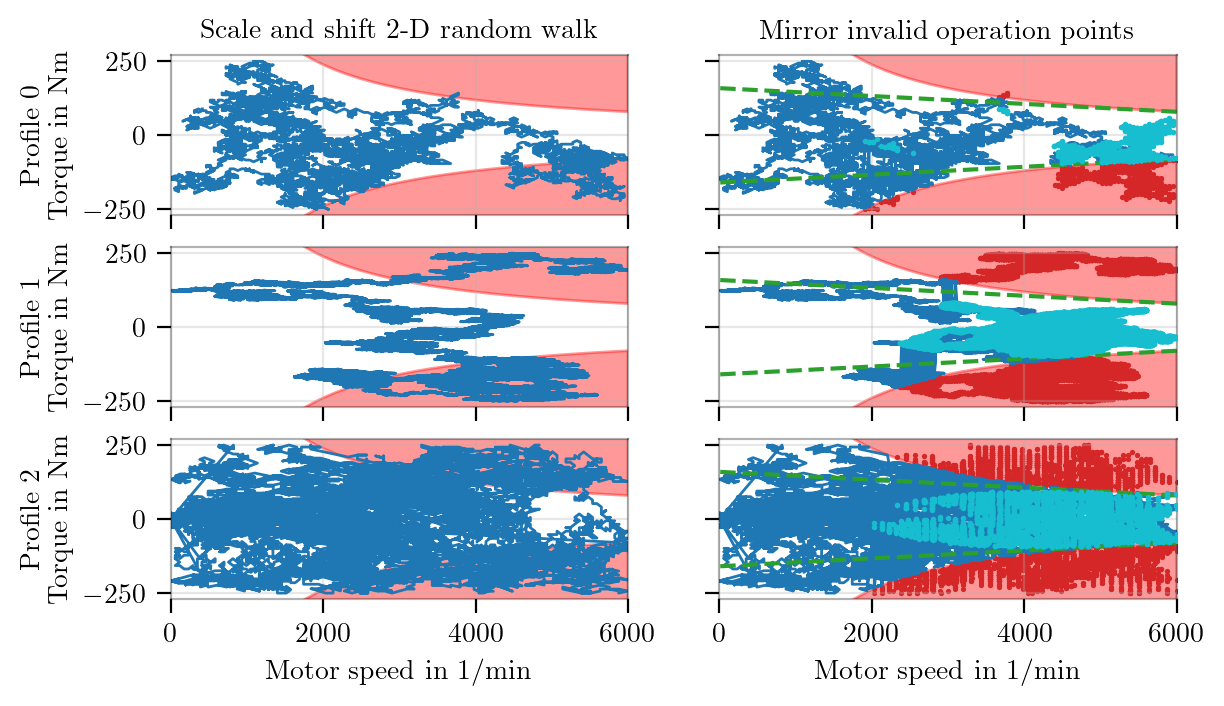

In [14]:
P_lim = 50e3
x = np.linspace(10, 6000, 600)
torque_lim = P_lim*60/(2*np.pi*x)
titles = ["Scale and shift 2-D random walk",
          "Mirror invalid operation points"]
fig_scale = 1.0
fig_size = (6.49*fig_scale, 1.2*fig_scale*3)   # fit into diss format          
mirrored_walks = []
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=fig_size, dpi=200)
for i, walk in enumerate(random_walks):
    # scale
    ax = axes[i, 0]
    if i == len(random_walks) -1:
        sub_walks = []
        seq_len = seq_lens[i]
        for sub_walk_idx in range(resting_phases+1):
            sub_walk = walk[sub_walk_idx*seq_len:(sub_walk_idx+1)*seq_len, :]
            walk_min, walk_max = np.amin(sub_walk, axis=0).reshape(1, -1), np.amax(sub_walk, axis=0).reshape(1, -1)
            unnorm_walk = ((sub_walk - walk_min) / (walk_max - walk_min)) * np.array([6000, 500]).reshape(1, -1) + np.array([0, -250]).reshape(1, -1)
            sub_walks.append(unnorm_walk)
            sub_walks.append(np.zeros((np.random.randint(30, 360), 2)))  # rest phase
        unnorm_walk = np.vstack(sub_walks)

    else:
        walk_min, walk_max = np.amin(walk, axis=0).reshape(1, -1), np.amax(walk, axis=0).reshape(1, -1)
        unnorm_walk = ((walk - walk_min) / (walk_max - walk_min)) * np.array([6000, 500]).reshape(1, -1) + np.array([0, -250]).reshape(1, -1)
    
    ax.plot(unnorm_walk[:, 0], unnorm_walk[:, 1], lw=1)
    ax.fill_between(x, torque_lim, 10*torque_lim, color='r', alpha=0.4)
    ax.fill_between(x, -torque_lim, -10*torque_lim, color='r', alpha=0.4)
    ax.set_ylim([-270, 270])
    ax.set_xlim([0, 6000])
    if i == 0:
        ax.set_title(titles[0])
    elif i == len(random_walks) -1:
        ax.set_xlabel("Motor speed in 1/min")
    ax.set_ylabel(f"Profile {i}\nTorque in Nm")
    prettify(ax)
    # mirror
    ax = axes[i, 1]
    if i == 0:
        ax.set_title(titles[1])
    elif i == len(random_walks) -1:
        ax.set_xlabel("Motor speed in 1/min")
    dy = (torque_lim[-2] - torque_lim[-1])
    y_0_1 = dy * torque_lim.size + torque_lim[-1] 
    #ax.plot(unnorm_walk[:, 0], unnorm_walk[:, 1], lw=1)
    
    ax.fill_between(x, torque_lim, 10*torque_lim, color='r', alpha=0.4)
    ax.fill_between(x, -torque_lim, -10*torque_lim, color='r', alpha=0.4)
    ax.set_ylim([-270, 270])
    ax.set_xlim([0, 6000])

    mirrored_walk, mirrored_flags = mirror_points_outside_valid_operation(unnorm_walk, P_lim, (10, y_0_1), (6000, torque_lim[-1]))
    ax.plot(mirrored_walk[:, 0], mirrored_walk[:, 1], color='tab:blue', lw=1)
    ax.scatter(unnorm_walk[mirrored_flags, 0], unnorm_walk[mirrored_flags, 1], color='tab:red', s=0.8, marker='o')
    ax.scatter(mirrored_walk[mirrored_flags, 0], mirrored_walk[mirrored_flags, 1], color="tab:cyan", s=1, marker='o', zorder=3)

    ax.plot([10, 6000], [y_0_1, torque_lim[-1]], color="tab:green", ls='--')
    ax.plot([10, 6000], [-y_0_1, -torque_lim[-1]], color="tab:green", ls='--')

    mirrored_walks.append(mirrored_walk)
    prettify(ax)
#fig.tight_layout()
fig.savefig(IMG_PATH / 'diss_excit_profile_generation.jpg', dpi=300, bbox_inches='tight')
fig.savefig(IMG_PATH / 'diss_excit_profile_generation.pdf', dpi=300, bbox_inches='tight')


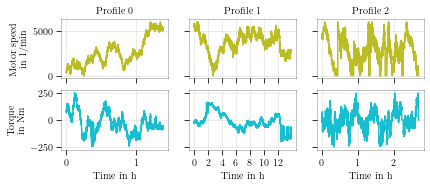

In [15]:
fig_scale = 1.0  # for seaborn "talk" context
fig_size = (6.49*fig_scale, 0.8*fig_scale*3)   # fit into diss format          

fig, axes = plt.subplots(2, 3, sharex="col", sharey="row", figsize=fig_size, dpi=200)
for i, walk in enumerate(mirrored_walks):
    ax = axes[0, i]
    ax.plot(walk[:, 0], color="tab:olive")
    ax.set_title(f"Profile {i}")
    if i == 0:
        ax.set_ylabel("Motor speed\nin 1/min")
    prettify(ax)
    ax = axes[1, i]
    ax.plot(walk[:, 1], color="tab:cyan")
    ax.set_xlabel("Time in h")
    if i == 0:
        ax.set_ylabel("Torque\nin Nm")
    tcks = np.arange(0, np.around(walk.shape[0], -3), ((i%2)+ 1)*1*7200)
    tcks_lbls = tcks // 7200
    ax.set_xticks(tcks)
    ax.set_xticklabels(tcks_lbls)
    prettify(ax)
#fig.tight_layout()
fig.savefig(IMG_PATH / 'diss_excit_profile_generation_trend.pdf', dpi=300, bbox_inches='tight')

### Clustering

In [3]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import islice, cycle
kaggle_ds = KaggleDataSet(with_extra_cols=True)
kaggle_ds.normalize()

In [4]:
excitation_cat = {'constant': [2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17,
                            18, 19, 21, 23, 24, 26, 30, 31, ],
                  'random': [l for l in range(46, 82) if l != 77],
                  'mixed': [6, 11, 20, 27, 29, 32, 36, 41, 42, 43, 44, 45]}
cat2color = {'constant': 'tab:blue',  'mixed': 'tab:orange', 'random': 'tab:red',}                  
p2cat = {}
for cat, p_l in excitation_cat.items():
    for p in p_l:
        p2cat[p] = cat
p2cat = pd.Series(p2cat)
p2catlabel = p2cat.map({c: i for i, c in enumerate(p2cat.unique())})
p2catcolor = p2cat.map(cat2color)


In [5]:

aggregated_df = (kaggle_ds.data.assign(#pm_minus_sy=lambda x: x.pm - x.stator_yoke, pm_minus_sw=lambda x: x.pm - x.stator_winding, pm_minus_st=lambda x: x.pm - x.stator_tooth,
                                       # pm_over_sy=lambda x: x.pm/x.stator_yoke, pm_over_sw=lambda x: x.pm/x.stator_winding, pm_over_st=lambda x: x.pm/x.stator_tooth,
                                        temp_dispersion=lambda x: x.loc[:, kaggle_ds.target_cols].max(axis=1) - x.loc[:, kaggle_ds.target_cols].min(axis=1),
                                        current=lambda x: np.sqrt(x.i_d**2 + x.i_q**2))
                   .groupby(kaggle_ds.pid).agg(['max', 'min', 'median', 'std', 
                                               #lambda x: np.quantile(x, .05), lambda x: np.quantile(x, .95),
                                               #lambda x: np.quantile(x, .2), lambda x: np.quantile(x, .8),
                                               #lambda x: x.iloc[0],
                                              ])
                    
                )
# merge column levels
aggregated_df.columns = ['_'.join((a, b)) for a, b in aggregated_df.columns]
idx2p = aggregated_df.reset_index(drop=False).profile_id
p2idx = pd.Series({v: k for k, v in idx2p.to_dict().items()})
resting_phases_len = {}
ewms_integral = {}
excit_cols = ['motor_speed', 'torque']
for p, df in kaggle_ds.data.groupby(kaggle_ds.pid):
    resting_phases_len[p] = (df.torque < 0.01).astype(int).sum() / len(df)
    ewms_integral[p] = (df.loc[:, excit_cols].ewm(span=700).std() /df.loc[:, excit_cols].max(axis=0)).sum().sum()
aggregated_df = aggregated_df.join(pd.Series(resting_phases_len, name="resting_phase_len"))\
                             .join(kaggle_ds.get_pid_sizes().rename('size') / len(kaggle_ds.data))\
                             .join(pd.Series(ewms_integral, name='ewms_s_700_integral') / 16000)
                             #.join(p2catlabel.rename("excit_cat"))\
                    
aggregated_df

,ambient_max,ambient_min,ambient_median,ambient_std,coolant_max,coolant_min,coolant_median,coolant_std,u_d_max,u_d_min,...,temp_dispersion_min,temp_dispersion_median,temp_dispersion_std,current_max,current_min,current_median,current_std,resting_phase_len,size,ewms_s_700_integral
profile_id,,,,,,,,,,,,,,,,,,,,,
2,0.116958,0.098463,0.111520,0.003106,0.098873,0.077974,0.092630,0.001643,0.012933,-0.074663,...,0.020832,0.075800,0.126590,0.917221,5.825243e-07,0.008066,0.441575,0.616986,0.014545,0.047822
3,0.114516,0.100789,0.110171,0.001671,0.097207,0.087897,0.093464,0.001594,0.012742,-0.041204,...,0.020162,0.040626,0.016564,0.466595,8.048011e-03,0.008076,0.229190,0.500987,0.014463,0.053732
4,0.131480,0.109622,0.122907,0.004223,0.099578,0.083542,0.092930,0.001928,0.013444,-0.959035,...,0.023479,0.097086,0.056903,0.839139,7.120457e-03,0.008070,0.271396,0.611656,0.025115,0.160263
5,0.118597,0.099264,0.115486,0.003181,0.099846,0.089566,0.093774,0.001837,-0.000944,-0.328320,...,0.034940,0.061638,0.010287,0.466597,8.048698e-03,0.008068,0.226291,0.578104,0.011112,0.044836
6,0.151152,0.090236,0.129432,0.006190,0.336358,0.068810,0.094183,0.087383,0.999539,-1.000000,...,0.030657,0.148035,0.034464,1.204966,7.553854e-03,0.517717,0.238315,0.237422,0.030348,0.281997
7,0.119075,0.099347,0.115420,0.002888,0.096920,0.090406,0.093405,0.001414,0.012861,-0.168029,...,0.027756,0.059912,0.005295,0.466596,4.529790e-03,0.466590,0.175582,0.178008,0.011009,0.055494
8,0.123972,0.099253,0.116458,0.006155,0.097187,0.077587,0.092959,0.002041,0.012152,-0.490382,...,0.023272,0.071451,0.012481,0.466597,5.215422e-03,0.466588,0.229021,0.480194,0.014094,0.061190
9,0.131921,0.115641,0.125688,0.004213,0.099707,0.087721,0.093030,0.002017,0.010584,-0.764142,...,0.029551,0.089506,0.017565,0.491930,4.707673e-03,0.491210,0.239965,0.441926,0.015281,0.061073
10,0.117642,0.099253,0.113388,0.004332,0.100297,0.087486,0.093456,0.001925,0.999087,-0.996761,...,0.022458,0.100796,0.048765,0.942346,8.056623e-03,0.114591,0.227091,0.659085,0.011464,0.153478


/home/wk/dev/tools/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wk/dev/tools/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wk/dev/tools/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wk/dev/tools/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

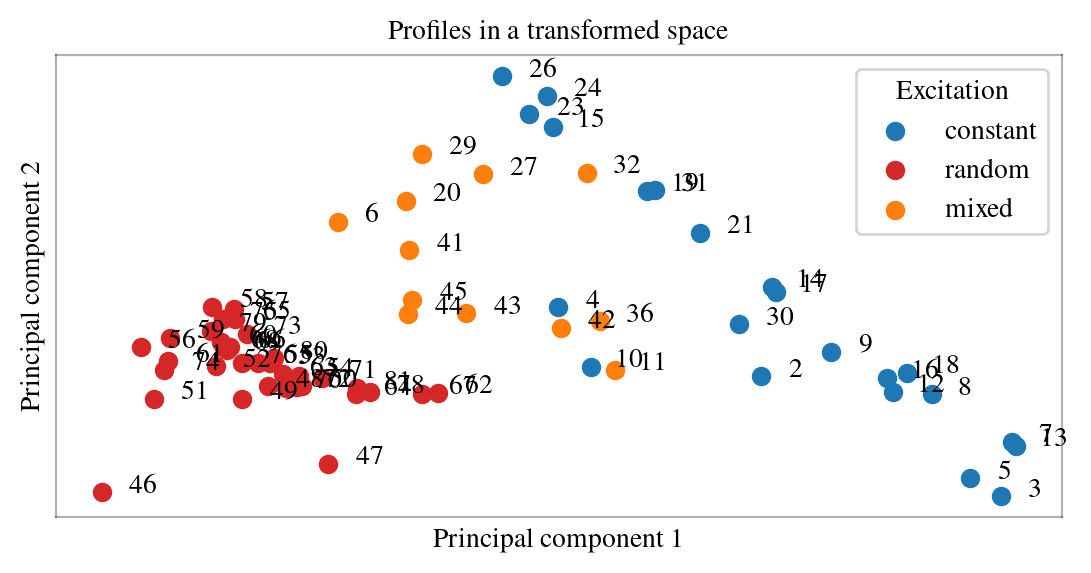

In [6]:
# k means clustering
fig_scale = 1.0  # for seaborn "talk" context
fig_size = (6.49*fig_scale, 3*fig_scale*1)   # fit into diss format       
clusterers = [KMeans(n_clusters=i) for i in [2, 3, 4, 5]]
pca = PCA(n_components=10)

aggregated_scaled_df = StandardScaler().fit_transform(aggregated_df)
for c in clusterers:
    c.fit(aggregated_scaled_df)
transformed_df = pca.fit_transform(aggregated_scaled_df)
plt.figure(figsize=fig_size, dpi=200)
for cat, p_l in excitation_cat.items():
    plt.scatter(transformed_df[p2idx[p_l], 0], transformed_df[p2idx[p_l], 1], color=cat2color[cat], label=cat)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
#plt.xlim(-16, 16)
#plt.ylim(-16, 16)
plt.title('Profiles in a transformed space')
plt.legend(title='Excitation', frameon=True)
ax = plt.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
prettify(ax)
ax.grid()
for i in range(len(transformed_df)):
    plt.annotate(aggregated_df.index.values[i], 
                 (transformed_df[i, 0], transformed_df[i, 1]),
                 xytext=(transformed_df[i, 0]+.5, transformed_df[i, 1]))
#plt.savefig(IMG_PATH / 'diss_kaggle_pca_enums.pdf', dpi=160, bbox_inches='tight')

array([0.35646193, 0.16953748, 0.12084203, 0.06951134, 0.0604991 ,
       0.03398039, 0.03140047, 0.02905375, 0.01875818, 0.01680109])

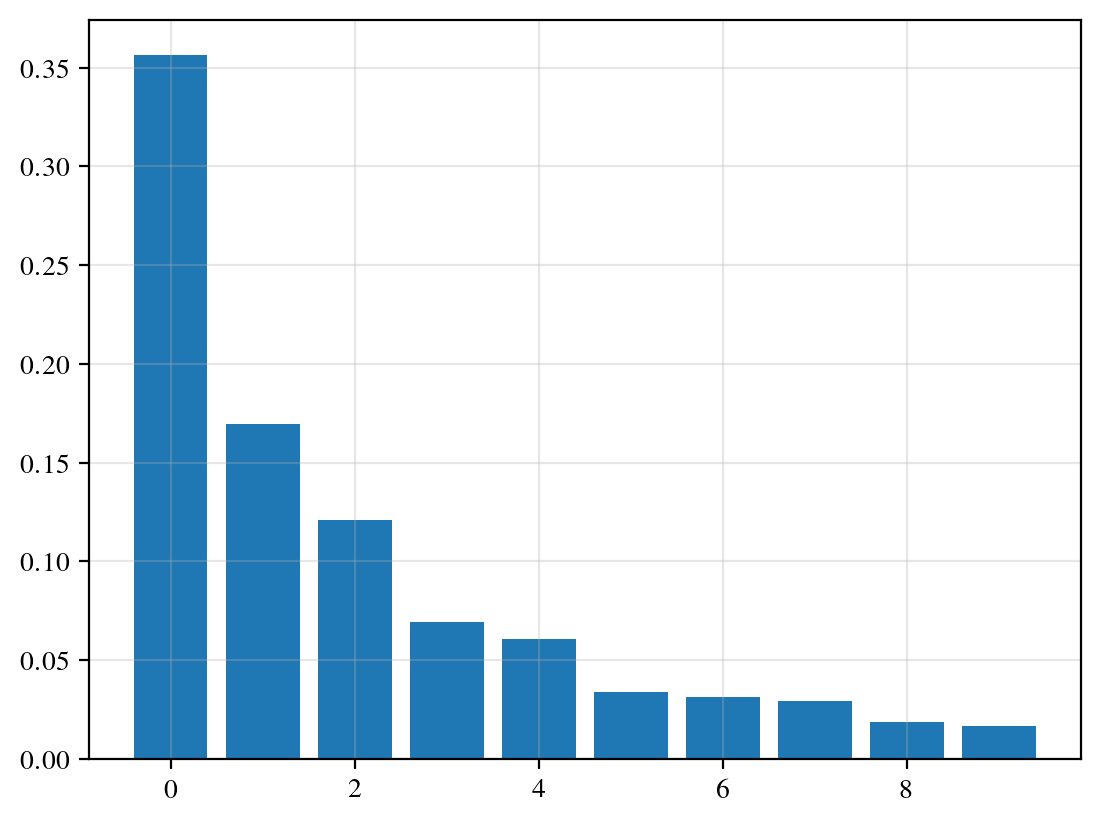

In [13]:
# how much variance is explained by the principal components?
plt.bar(x=np.arange(pca.explained_variance_ratio_.size) ,height=pca.explained_variance_ratio_)
pca.explained_variance_ratio_

Profile sizes in hours
Training: 158.678056 hours, 85.85%
Validation: 2.035556 hours, 1.10%
Test: 5.568611 hours, 3.01%
Generalization: 18.553333 hours, 10.04%


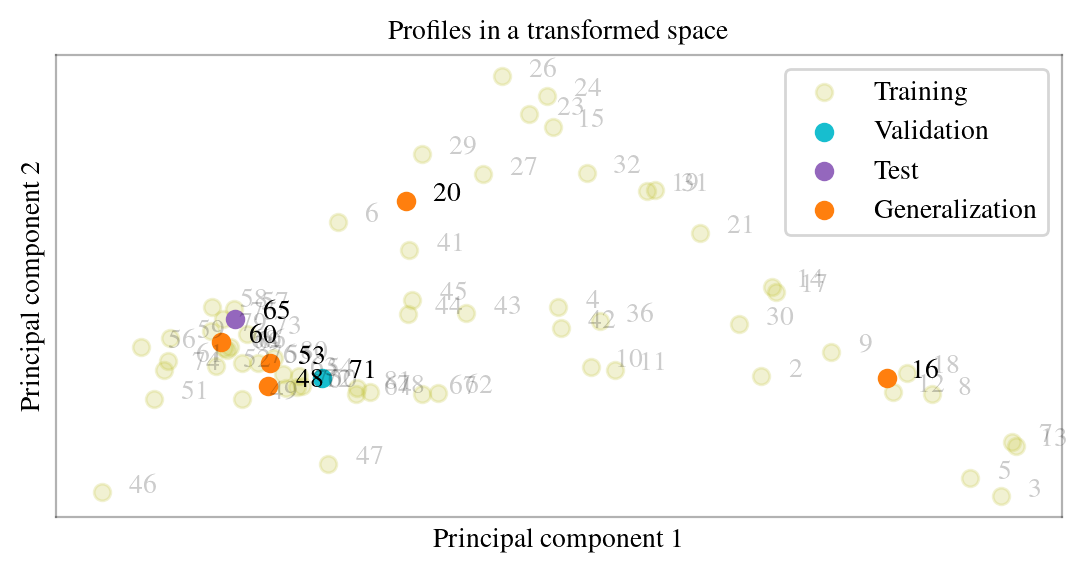

In [23]:
# same plot but with test splits highlighted
splits_d = {'Training': (None, 'tab:olive'),
            'Validation': ([71], 'tab:cyan'),
            'Test': ([65], 'tab:purple'),
            'Generalization': ([16, 20, 48, 53, 60], 'tab:orange'),
            }

nontrain_ps = []
for lbl, (p_l, clr) in splits_d.items():
    if p_l is not None:
        nontrain_ps.extend(p_l)
profile_sizes = kaggle_ds.get_pid_sizes()

print("Profile sizes in hours")
for set_lbl, (p_l, _) in splits_d.items():
    if p_l is None:
        n_samples = profile_sizes.loc[[p for p in profile_sizes.index.tolist() if p not in nontrain_ps]].sum()
    else:
        n_samples = profile_sizes.loc[p_l].sum()
    print(f"{set_lbl}: {n_samples/7200:1f} hours, {n_samples/len(kaggle_ds.data):.2%}")

plt.figure(figsize=fig_size)
plt.scatter(transformed_df[:, 0], transformed_df[:, 1], label='Training', alpha=0.2, color=splits_d["Training"][1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Profiles in a transformed space')
ax = plt.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.grid()
prettify(ax)
for i in range(len(transformed_df)):
    plt.annotate(aggregated_df.index.values[i],
                 (transformed_df[i, 0], transformed_df[i, 1]),
                 alpha=1.0 if idx2p[i] in nontrain_ps else 0.2,
                 xytext=(transformed_df[i, 0]+.5, transformed_df[i, 1]))
for lbl, (p_l, clr) in splits_d.items():
    if p_l is not None:
        filtered_transformed_df = transformed_df[p2idx[p_l], :]
        ax.scatter(filtered_transformed_df[:, 0], filtered_transformed_df[:, 1], label=lbl, color=clr)
plt.legend(ncol=1, frameon=True)
plt.savefig(IMG_PATH / 'diss_set_assignment_pca.pdf', dpi=300, bbox_inches='tight')

#### Show Evaluation sets as time series

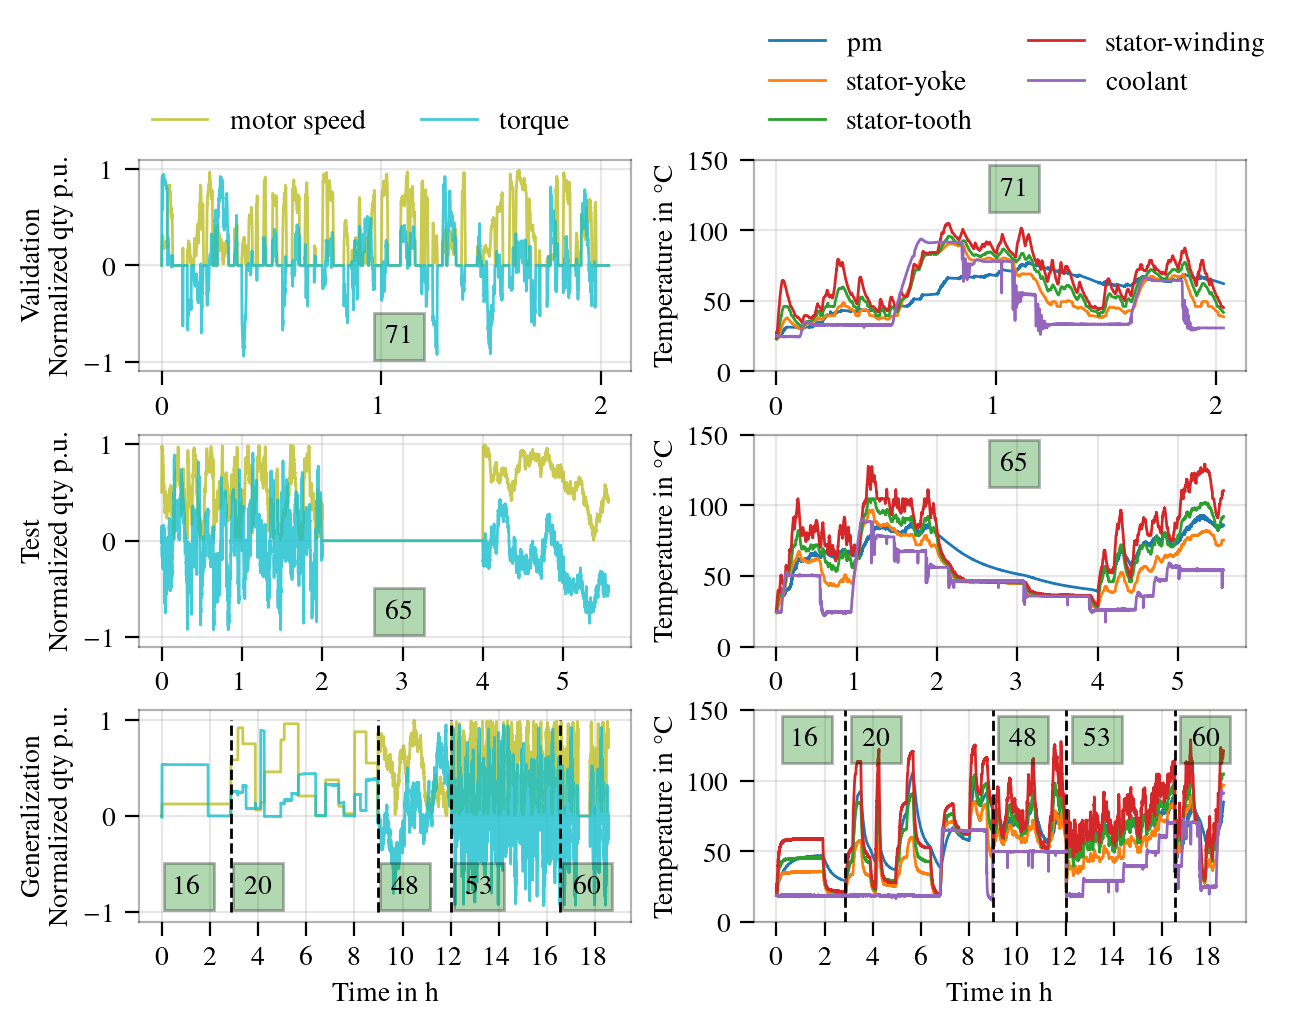

In [24]:
fig_scale = 1.1  # for seaborn "talk" context
fig_size = (6.49*fig_scale, 1.5*fig_scale*3)   # fit into diss format
fig, axes = plt.subplots(3, 2, sharex=False, sharey="col", figsize=fig_size, dpi=200)

temp_cois = kaggle_ds.target_cols + ['coolant']

for plt_idx, (set_lbl, (profiles_l, _)) in enumerate(splits_d.items(), start=-1):
    if profiles_l is None:
        continue
    profiles_df = pd.concat([df for p, df in kaggle_ds.data.groupby(
        kaggle_ds.pid, sort=True) if p in profiles_l], ignore_index=True)
    sizes_s = profile_sizes.loc[profiles_l].cumsum().to_numpy()
    annot_positions = list(np.hstack([0, sizes_s[:-1]]))
    tick_multiplier = 2 if plt_idx == 2 else 1
    tcks = np.arange(0, np.around(profiles_df.shape[0], -3), tick_multiplier*7200)
    tcks_lbls = tcks // (7200)

    ax = axes[plt_idx, 0]
    #ax.grid(alpha=0.5)
    ax.plot(profiles_df.motor_speed, label='motor speed', color='tab:olive', alpha=.8, lw=1)
    ax.plot(profiles_df.torque, label='torque', color='tab:cyan', alpha=.8, lw=1)
    ax.set_xticks(tcks)
    ax.set_xticklabels(tcks_lbls)
    ax.vlines(sizes_s[:-1], ymin=-1, ymax=1, ls='--', colors='black', zorder=3, lw=1)


    for p, pos in zip(profiles_l, annot_positions):
        x_pos = pos+4000 if plt_idx == 2 else sizes_s[0] // 2
        ax.annotate(p, xy=(x_pos, -0.8), bbox=dict(facecolor='green', alpha=0.3))
    ax.set_ylabel(f"{set_lbl}\nNormalized qty p.u.")

    if plt_idx == 0:
        ax.legend(ncol=2, loc='lower center', bbox_to_anchor=(.28, .88), bbox_transform=fig.transFigure, frameon=False)
    elif plt_idx == 2:
        ax.set_xlabel("Time in h")
    prettify(ax)
    ax = axes[plt_idx, 1]
    #ax.grid(alpha=0.5)
    ax.plot(kaggle_ds.temperature_scale * profiles_df.loc[:, temp_cois], label=[t.replace("_", "-") for t in temp_cois],
            lw=1)
    ax.set_xticks(tcks)
    ax.set_xticklabels(tcks_lbls)
    for p, pos in zip(profiles_l, annot_positions):
        x_pos = pos+5000 if plt_idx == 2 else sizes_s[0] // 2
        ax.annotate(p, xy=(x_pos, 125), bbox=dict(facecolor='green', alpha=0.3))
    ax.set_ylabel("Temperature in °C")
    ax.set_ylim(0, 150)
    ax.vlines(sizes_s[:-1], ymin=0, ymax=150, ls='--', colors='black', zorder=3, lw=1)

    if plt_idx == 0:
        ax.legend(ncol=2, loc='lower center', bbox_to_anchor=(.74, .88), bbox_transform=fig.transFigure, frameon=False)
    elif plt_idx == 2:
        ax.set_xlabel("Time in h")
    prettify(ax)
# fig.tight_layout()
fig.subplots_adjust(wspace=0.25, hspace=0.3)
fig.savefig(IMG_PATH / 'diss_sets_ts.pdf', dpi=300, bbox_inches='tight')
fig.savefig(IMG_PATH / 'diss_sets_ts.jpg', dpi=300, bbox_inches='tight')

#### Show cluster color encodings

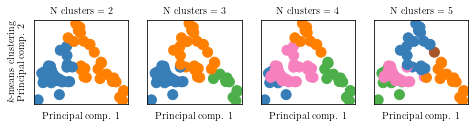

In [22]:
fig, axes = plt.subplots(1, len(clusterers), sharey=True, sharex=True, figsize=(6.49*fig_scale, 1.3*fig_scale*1))
clr_list = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

for ax, (i, c) in zip(axes.flatten(), enumerate(clusterers)):
    y_pred = c.labels_.astype(int)
    colors = np.array(list(islice(cycle(clr_list), int(len(y_pred) + 1))))

    ax.scatter(transformed_df[:, 0], transformed_df[:, 1], s=100,  color=colors[y_pred])
    ax.set_xlabel('Principal comp. 1')
    if i == 0:
        ax.set_ylabel('$k$-means clustering\nPrincipal comp. 2')
    ax.set_title(f'N clusters = {c.cluster_centers_.shape[0]}')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid()
#fig.suptitle("K-means clustering")
#fig.tight_layout()

In [23]:
# spectral clustering on dtw: generate affinity matrix with dtw
from tslearn.metrics import dtw
from joblib import Parallel, delayed

n_profiles = kaggle_ds.data.groupby(kaggle_ds.pid).ngroups
profiles_d = {k: v.drop(columns=[kaggle_ds.pid]) for k, v in kaggle_ds.data.groupby(kaggle_ds.pid)}
dtw_arr = np.zeros((n_profiles, n_profiles))
dtw_d = {}

def feed_dtw_mat(i, p):
    for j, pp in profiles_d.items():
        k = f"{i}_{j}"
        inv_k = f"{j}_{i}"
        if k not in dtw_d and inv_k not in dtw_d:
            dtw_d[k] = dtw(p, pp)
dtw_path = Path.cwd().parent / "notebooks"/ "dtw_arr.npy"
if Path.exists(dtw_path):
    dtw_arr = np.load(dtw_path)
else:
    raise FileNotFoundError()
    with Parallel(n_jobs=-1) as prll:
        ret = prll(delayed(feed_dtw_mat)(i,p) for i, p in profiles_d.items())
    for k, dtw_v in dtw_d.items():
        i, j = k.split("_")
        dtw_arr[int(i), int(j)] = dtw_v
    dtw_arr += dtw_arr.T

/home/wilhelmk/dev/tools/anaconda3/envs/torch/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


/home/wilhelmk/dev/tools/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/wilhelmk/dev/tools/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/wilhelmk/dev/tools/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/wilhelmk/dev/tools/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


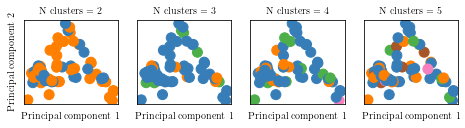

In [24]:
# spectral clustering

spectral_clusterers = [SpectralClustering(n_clusters=i, affinity="precomputed").fit(dtw_arr) for i in [2, 3, 4, 5]]
fig, axes = plt.subplots(1, len(spectral_clusterers), sharey=True, sharex=True, figsize=(6.49*fig_scale, 1.3*fig_scale*1))
for ax, (i, c) in zip(axes.flatten(), enumerate(spectral_clusterers)):
    y_pred = c.labels_.astype(int)
    colors = np.array(list(islice(cycle(clr_list), int(len(y_pred) + 1))))

    ax.scatter(transformed_df[:, 0], transformed_df[:, 1], s=100,  color=colors[y_pred])
    ax.set_xlabel('Principal component 1')
    if i == 0:
        ax.set_ylabel('Principal component 2')
    ax.set_title(f'N clusters = {i+2}')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid()
#fig.suptitle("Spectral clustering on DTW")
#fig.tight_layout()

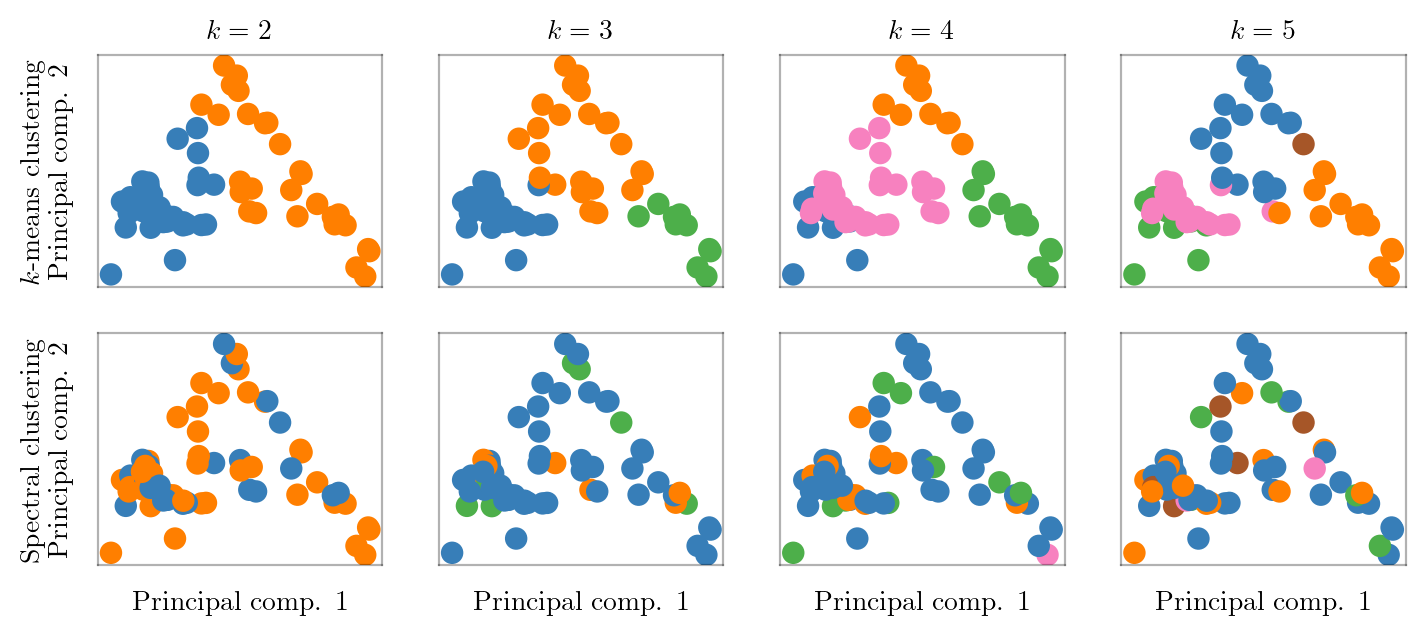

In [30]:
# both, k-means and dtw spectral clustering in one plot
fig_scale = 1.3
fig, axes = plt.subplots(2, len(spectral_clusterers), sharey=True, sharex=True, figsize=(6.49*fig_scale, 1.3*fig_scale*2), dpi=200)
for i, (c, c_s) in enumerate(zip(clusterers, spectral_clusterers)):
    y_pred_kmeans = c.labels_.astype(int)
    y_pred_spectral = c_s.labels_.astype(int)

    colors_kmeans = np.array(list(islice(cycle(clr_list), int(len(y_pred_kmeans) + 1))))
    colors_spectral = np.array(list(islice(cycle(clr_list), int(len(y_pred_spectral) + 1))))
    ax = axes[0, i]
    ax.scatter(transformed_df[:, 0], transformed_df[:, 1], s=50,  color=colors_kmeans[y_pred_kmeans])
    
    if i == 0:
        ax.set_ylabel('$k$-means clustering\nPrincipal comp. 2')
    ax.set_title(f'$k = {i+2}$')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid()
    prettify(ax)

    ax = axes[1, i]

    ax.set_xlabel('Principal comp. 1')
    ax.scatter(transformed_df[:, 0], transformed_df[:, 1], s=50,  color=colors_spectral[y_pred_spectral])
    
    if i == 0:
        ax.set_ylabel('Spectral clustering\nPrincipal comp. 2')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid()
    prettify(ax)
#fig.tight_layout()
fig.savefig(IMG_PATH / 'diss_kaggle_pca_clusterings.pdf', dpi=300, bbox_inches='tight')

### Moving Average Showcase

In [12]:
kaggle_ds = KaggleDataSet(with_extra_cols=True)
df19 = kaggle_ds.data.groupby(kaggle_ds.pid).get_group(4).reset_index(drop=True)

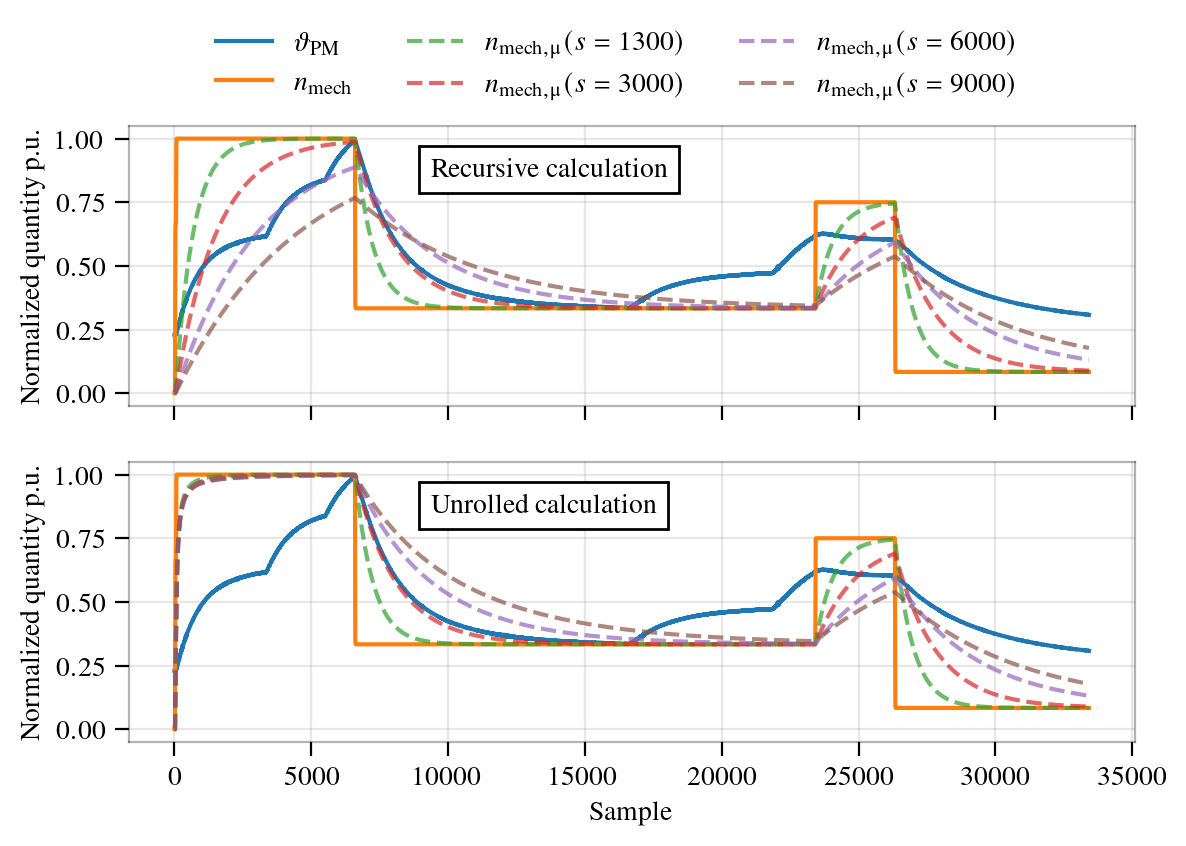

In [15]:
fig_scale = 1.0
fig, axes = plt.subplots(2, 1, sharey=True, sharex=True, figsize=(6.49*fig_scale, 2*fig_scale*2))
annotation_cfg = {'facecolor': 'white', 'edgecolor': 'black'}
#fig = plt.figure(figsize=(6.49*fig_scale, 2.1*fig_scale))
ax = axes[0]
ax.plot(df19.pm / 100, label='$\\vartheta_\\textrm{{PM}}$')
#ax.plot(df19.stator_yoke / 100, label="$\\vartheta_\\textrm{{SY}}$")
ax.plot(df19.motor_speed / 6000, label="$n_\\textrm{{mech}}$")
for s in [1300, 3000, 6000, 9000]:
    ax.plot(df19.motor_speed.ewm(span=s, adjust=False).mean() / 6000, ls='--', alpha=0.7,
             label=f"$n_{{\\textrm{{mech}}, \\upmu}}(s={s})$")

ax.set_ylabel("Normalized quantity p.u.")
ax.annotate('Recursive calculation', xycoords='axes fraction',
            xy=(0.3, 0.82), bbox=annotation_cfg)
prettify(ax)

ax = axes[1]
ax.plot(df19.pm / 100, label='$\\vartheta_\\textrm{{PM}}$')
#ax.plot(df19.stator_yoke / 100, label="$\\vartheta_\\textrm{{SY}}$")
ax.plot(df19.motor_speed / 6000, label="$n_\\textrm{{mech}}$")
for s in [1300, 3000, 6000, 9000]:
    ax.plot(df19.motor_speed.ewm(span=s, adjust=True).mean() / 6000, ls='--', alpha=0.7,
             label=f"$n_{{\\textrm{{mech}}, \\upmu}}(s={s})$")
#tcks = np.arange(0, np.around(df19.shape[0], -3), 7200)
#tcks_lbls = tcks // 7200
#ax.set_xticks(tcks)
#ax.set_xticklabels(tcks_lbls)

ax.annotate('Unrolled calculation', xycoords='axes fraction',
            xy=(0.3, 0.82), bbox=annotation_cfg)
ax.set_xlabel('Sample')
ax.set_ylabel("Normalized quantity p.u.")
prettify(ax)
_ = ax.legend(ncol=3, loc='lower center', bbox_to_anchor=(.5, .88), bbox_transform=fig.transFigure, frameon=False)
fig.savefig(IMG_PATH / 'diss_ewma_showcase.pdf', dpi=160, bbox_inches='tight')